In [62]:

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [557]:
f = h5py.File('../Outfile_CellInformation.h5','r')
g = h5py.File('../DATA_PROCESSING/Outfile_TopoCluster.h5','r')

In [52]:
# for x in f.keys():
#     print(x)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np
norm = plt.Normalize()

event_index = 566

fig = plt.figure(figsize=(6*4,8))



ax_list = []
for layer_i in range(6):
    for res_i, res in enumerate(['RealRes','UniformRes']):
    
        ax_list.append( fig.add_subplot(2, 6, layer_i+1+6*res_i, projection='3d') ) 
        if layer_i+1+6*res_i == 1:
            ax_list[-1].set_title('Low Resolution',fontsize=25)
        elif layer_i+1+6*res_i == 7:
            ax_list[-1].set_title('High Resolution',fontsize=25)
        ax_list[-1].view_init(elev=30, azim=-30)

        X = f[res+'_TotalEnergy_Layer'+str(layer_i+1)][event_index]
        X_charged = f[res+'_ChargedEnergy_Layer'+str(layer_i+1)][event_index]
        X_neutral = f[res+'_NeutralEnergy_Layer'+str(layer_i+1)][event_index]
        
        layer_size = X.shape[1]
        X = X.reshape(layer_size,layer_size)
        X_charged = X_charged.reshape(layer_size,layer_size)
        X_neutral = X_neutral.reshape(layer_size,layer_size)
        
        small_x = 2.5*np.ones((layer_size,layer_size))
        
        Z, Y = np.meshgrid(range(layer_size),range(layer_size))
        
        X[X <= 0] = 0
        X[X > 0] = np.log(X[X>0])
        X = X/5
        ax_list[-1].plot_surface(0*small_x, Y, Z, 
                                facecolors=plt.cm.viridis(X))
        
        ax_list[-1].plot_surface(small_x*2, Y, Z, 
                                facecolors=plt.cm.Reds(X_charged),alpha=0.5)
        ax_list[-1].plot_surface(small_x*3, Y, Z, 
                                facecolors=plt.cm.Greens(X_neutral),alpha=0.5)
        
        ax_list[-1].set_xlabel('X')
        ax_list[-1].set_xlim(0,5)
        ax_list[-1].set_ylabel('Y')
        ax_list[-1].set_ylim(0, layer_size)
        ax_list[-1].set_zlabel('Z')
        ax_list[-1].set_zlim(0, layer_size)
        ax_list[-1].set_axis_off()
    
plt.tight_layout()    

plt.show()

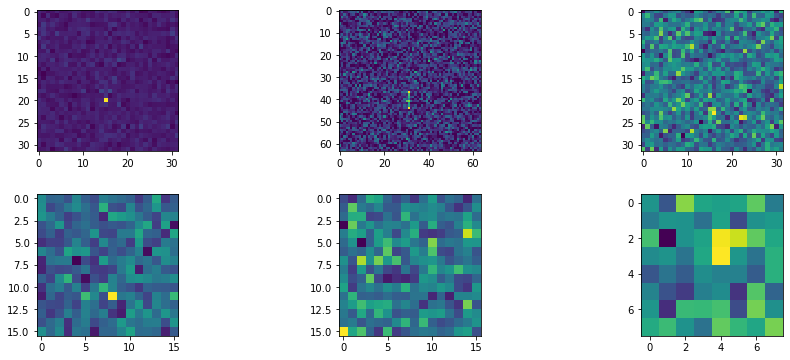

<Figure size 1080x432 with 0 Axes>

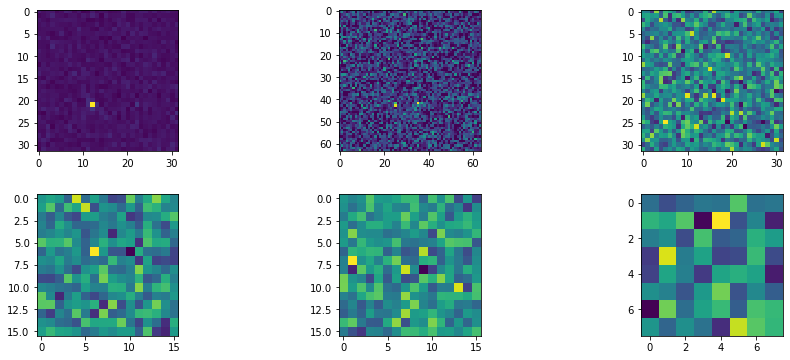

<Figure size 1080x432 with 0 Axes>

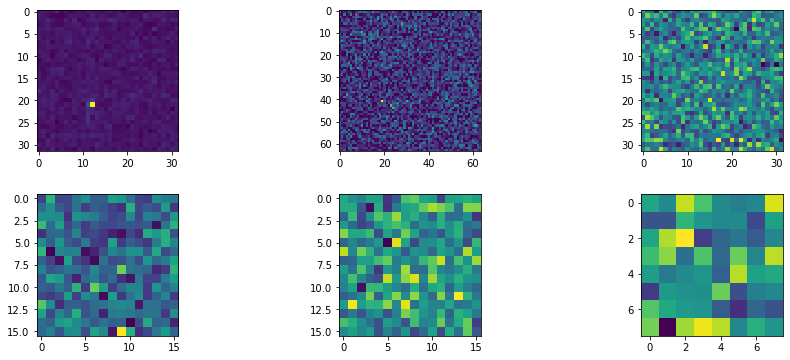

<Figure size 1080x432 with 0 Axes>

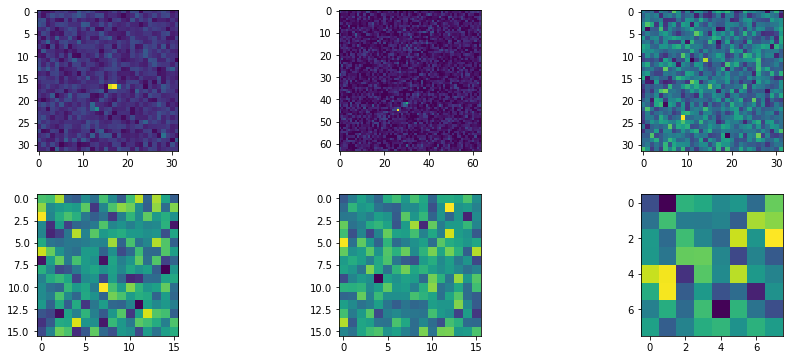

<Figure size 1080x432 with 0 Axes>

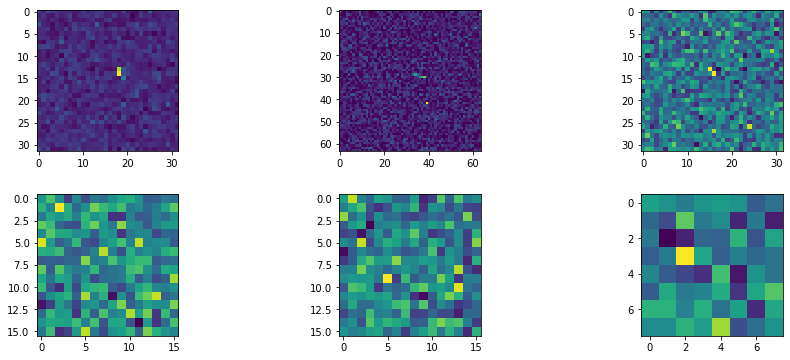

<Figure size 1080x432 with 0 Axes>

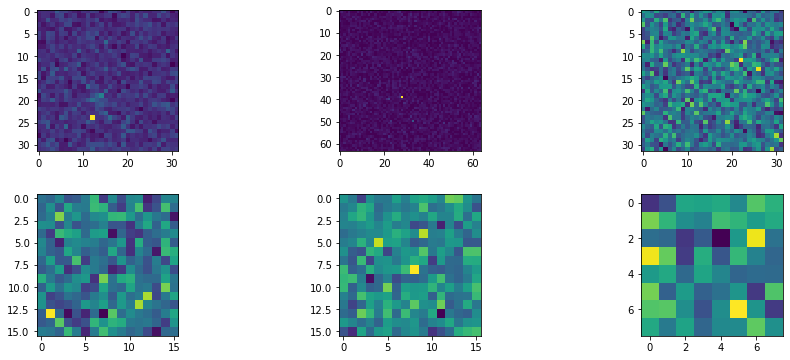

<Figure size 1080x432 with 0 Axes>

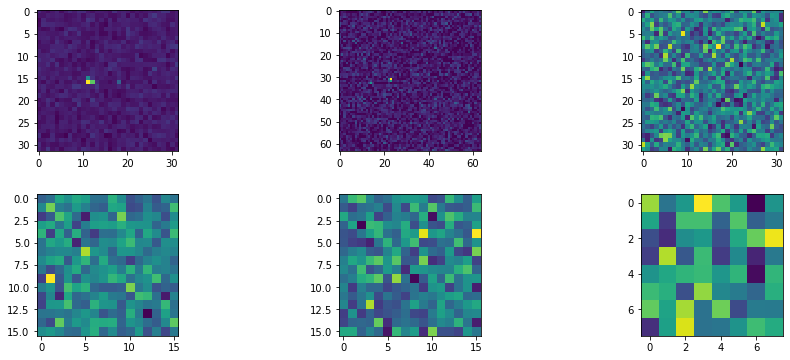

<Figure size 1080x432 with 0 Axes>

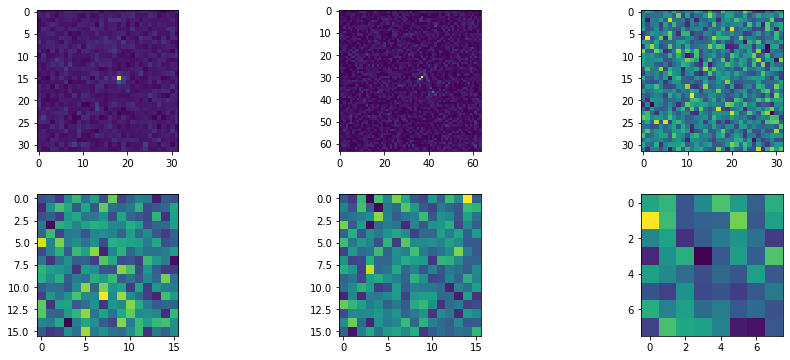

<Figure size 1080x432 with 0 Axes>

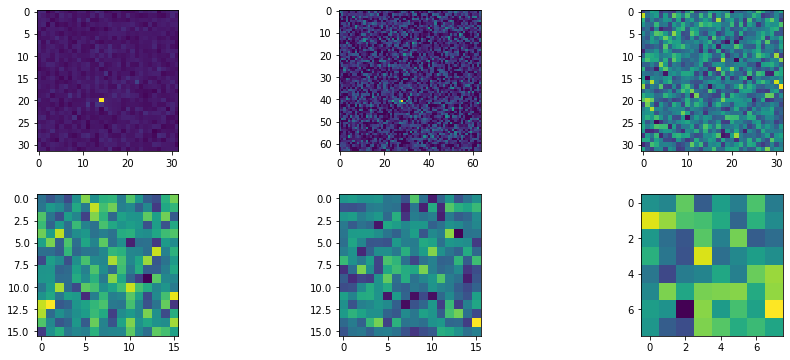

<Figure size 1080x432 with 0 Axes>

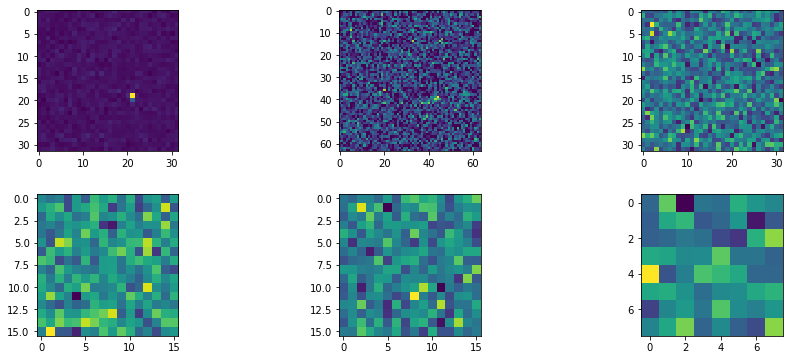

<Figure size 1080x432 with 0 Axes>

In [568]:
#fig, axs = plt.subplots(1,6)
for j in range(10):
    fig = plt.figure(figsize=(15, 6),facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(1,7):
        
        ax = fig.add_subplot(2, 3, i)
        CAL = f['RealRes_TotalEnergy_Layer'+str(i)][j]
        layer_size = CAL[0].shape[1]
        #print(CAL[0].shape)
        CAL[0] = CAL[0].reshape(layer_size,layer_size)
        #CAL[CAL <= 0] = 0
        #CAL[CAL > 0] = np.log(CAL[CAL>0])
        #print(CAL[0].shape)
        ax.imshow(CAL[0],interpolation='none')
    fig = plt.figure(figsize=(15, 6),facecolor="w", edgecolor='k')
    fig.subplots_adjust(hspace=0.3, wspace=0.3)


    

In [504]:
#print(len(g['TopoClusters1'][:]))
#print(f['RealRes_TotalEnergy_Layer3'][3][0])

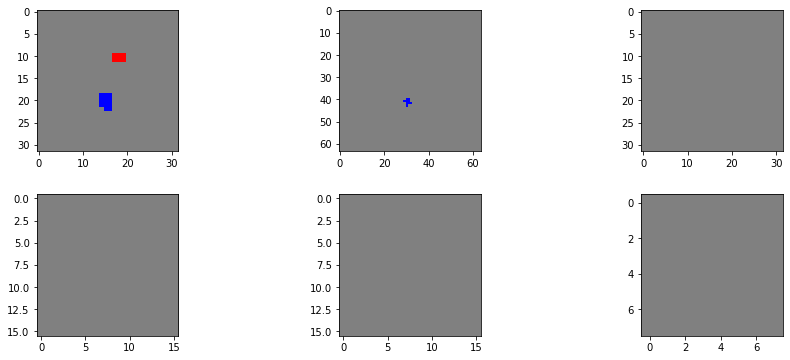

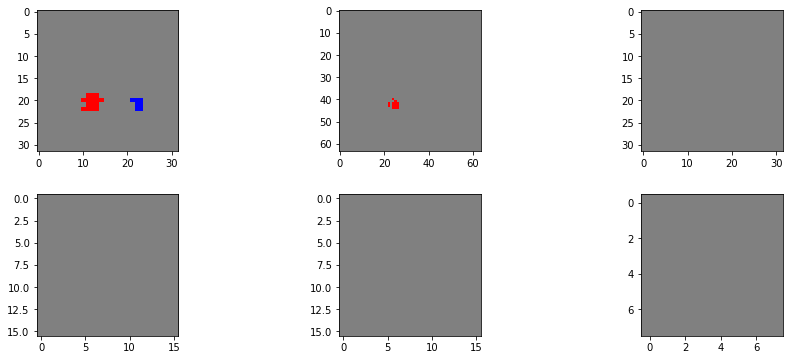

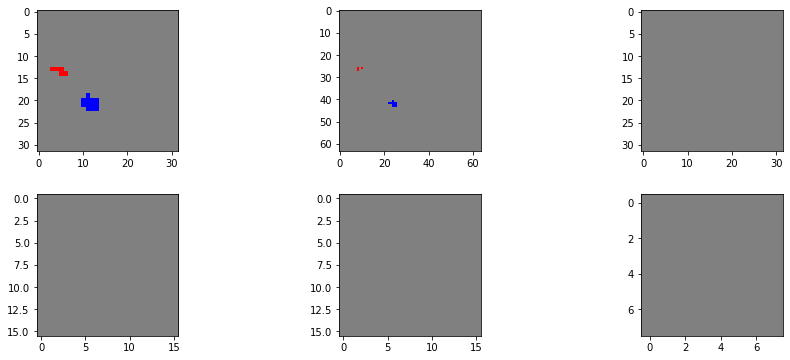

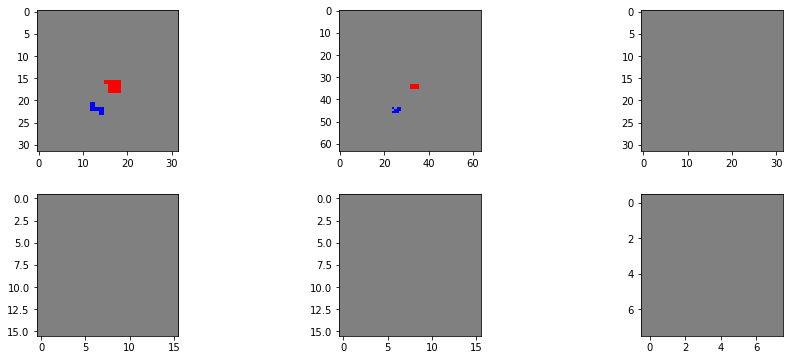

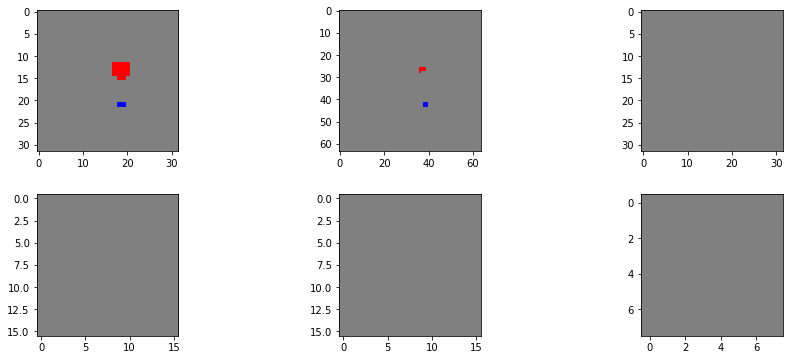

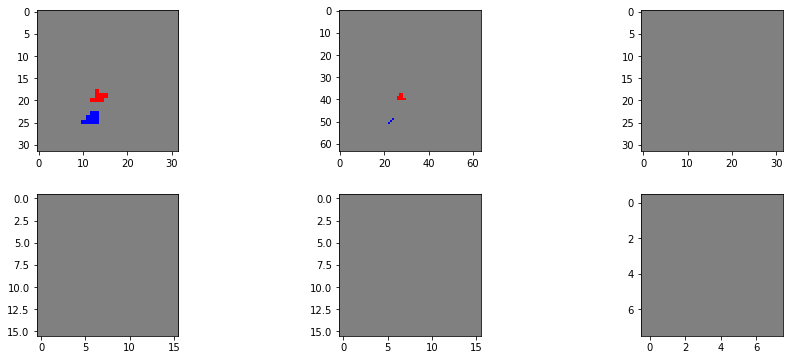

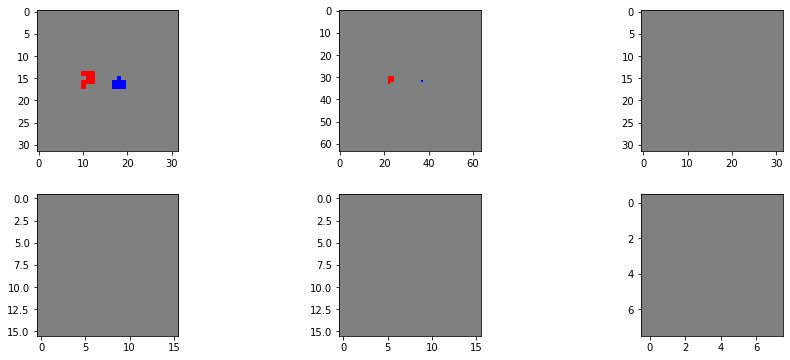

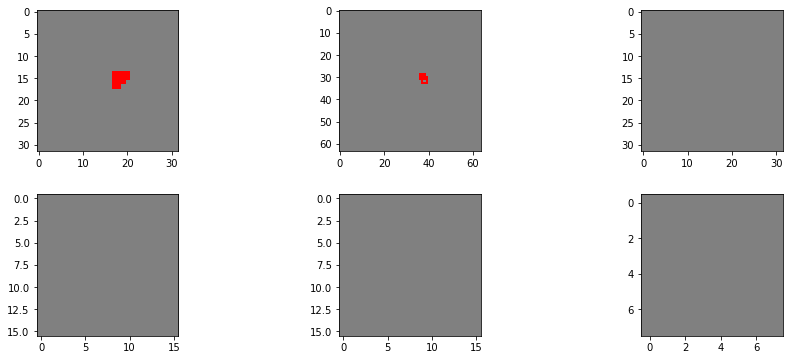

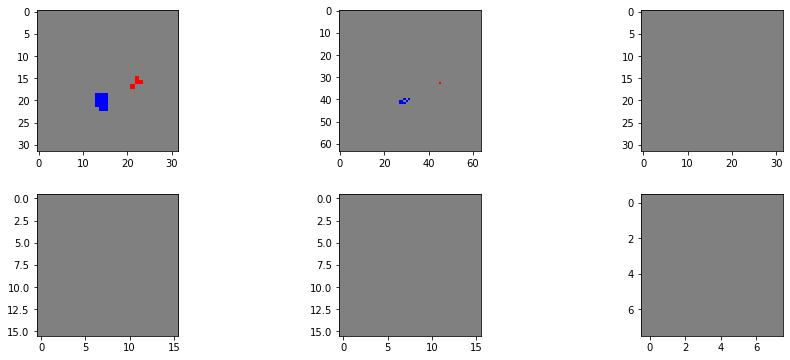

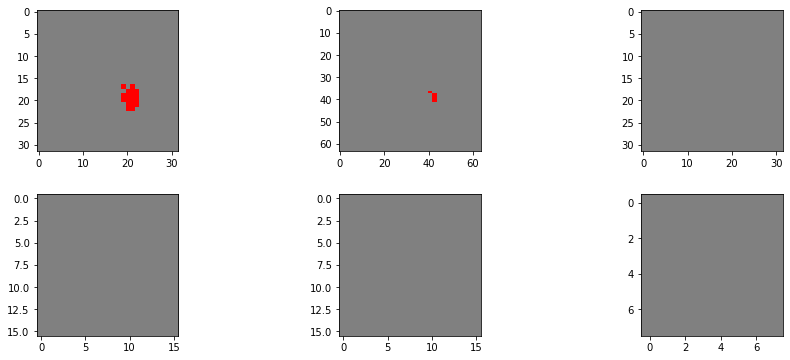

In [505]:
import matplotlib as m
cmap = m.colors.ListedColormap(['grey', 'red','blue', 'green', 'black' ])
bounds = [-0.5,0.5,1.5,2.5, 3.5, 4.5]
norm = m.colors.BoundaryNorm(bounds, cmap.N)

for j in range(10):
    fig = plt.figure(figsize=(15, 6),facecolor="w", edgecolor='k')
    fig.subplots_adjust(hspace=0.3, wspace=0.3)


    for i in range(1,7):
        ax = fig.add_subplot(2, 3, i)
        CAL = g['TopoClusters'+str(i)][j]
    
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2):
            size=64
        elif(i==6):
            size = 8
    
        CALL=CAL[0][0:size,0:size]
   # print(CALL)
   # print(CALL.shape)
        ax.imshow(CALL, cmap=cmap, norm=norm)

In [558]:
import numpy as np

def En_Eve(f,j):   
    En = 0
    EnL = 0
    for i in range(1,7):
        T = f['RealRes_NeutralEnergy_Layer'+str(i)][j][0]
            
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    
        TT=np.array(T[0:size,0:size])
        EnL=np.sum(TT)
        #print(EnL,i)
        En = En+EnL      
    return En

In [559]:
def En_Topo(g,j):
    En = 0
    EnL = 0
    EnTopo = []
    for i in range(1,7):
        Topo = g['TopoClusters'+str(i)][j][0]
        Calo = f['RealRes_NeutralEnergy_Layer'+str(i)][j][0]
            
        if(i==1 or i==3):
            size=32
        elif(i==4 or i ==5):
            size=16
        elif(i==2): 
            size=64
        elif(i==6):
            size = 8    
        #print(Topo[18][14])
        TopoA=np.array(Topo[0:size,0:size])
        CaloA=np.array(Calo[0:size,0:size])

        #print(len(TopoA))
        for X in range(len(TopoA)):
            for Y in range(len(TopoA)): 
                TopoI=int(TopoA[X][Y])
                #print(CaloA[32][32])
                if TopoI!=0:
                    if len(EnTopo)<TopoI: EnTopo.append(Calo[X][X])
                    else: EnTopo[TopoI-1]=EnTopo[TopoI-1]+CaloA[X][Y]     
        #EnL=np.sum(TopoA)
        #print(EnL,i)
    return EnTopo

In [561]:
events=len(g["TopoClusters1"][:])
TotEn=[]
NumTopo=np.zeros(events)
Ne90 = np.zeros(10)
NeN = []
print("looping")
for ev in range(events):
    Tot_En_Eve = En_Eve(f,ev)
    En_Top_Lis=np.sort(En_Topo(g,ev))[::-1]
    #print(ev)
    En_Top=0
    i=-1
    Appo=0
    while En_Top < 0.9 and i<len(En_Top_Lis)-1:
        i+=1
        Appo = En_Top
        En_Top=En_Top+En_Top_Lis[i]/Tot_En_Eve
    if ev%1000==1: print('still looping',ev)    
            
    Ne90[i+1]+=1
    NeN.append(i+1)
    
#print(NN)

looping
still looping 1
still looping 1001
still looping 2001
still looping 3001
still looping 4001
still looping 5001
still looping 6001


In [562]:
#NO CHANGE
NeutralN90=Ne90
NeutralNN=NeN
#NO CHANGE

In [553]:
#NO CHANGE
ChargedN90=Ne90
ChargedNN=NeN
#NO CHANGE

In [563]:
print(ChargedN90)
print(NeutralN90)

[1.046e+03 4.727e+03 1.106e+03 1.160e+02 4.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
[0.000e+00 1.347e+03 5.649e+03 4.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]


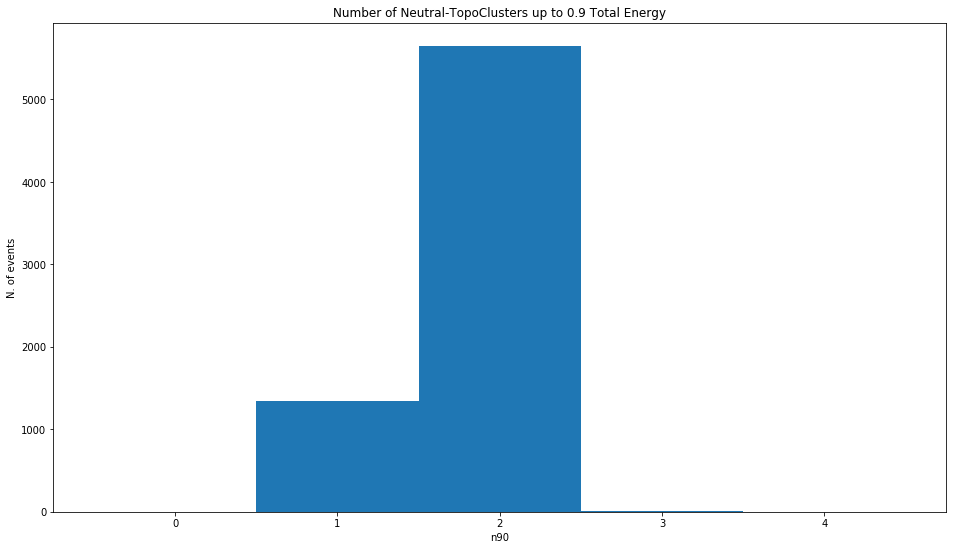

In [565]:
#print(N90)
#
bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
tick= bins[:-1]+np.ones(len(bins))[1:]/2

hist, bins = np.histogram(NeutralNN, bins=bins )
width = np.diff(bins)
center = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(16,9))
ax.bar(center, hist, align='center', width=width)
ax.set_xticks(tick)
ax.set_xlabel("n90")
ax.set_ylabel("N. of events")
ax.set_title("Number of Neutral-TopoClusters up to 0.9 Total Energy")
plt.savefig("neutral.png")
plt.show()